## Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Not a reliable airline. You...
1,✅ Trip Verified | I take comfort in reading t...
2,✅ Trip Verified | The worst journey in my lif...
3,✅ Trip Verified | The airplanes and the lounge...
4,✅ Trip Verified | One of the worst experiences...


In [ ]:
import os

# Membuat direktori "data" jika belum ada
if not os.path.exists("data"):
    os.mkdir("data")

In [ ]:
df.to_csv("data/BA_reviews.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Cleansing

In [ ]:
import pandas as pd
import re

# Membaca dataset dari file CSV (pastikan file "BA_reviews.csv" ada di direktori yang benar)
df = pd.read_csv("data/BA_reviews.csv")

# Fungsi untuk membersihkan teks ulasan
def clean_text(text):
    # Menghapus "✅ Trip Verified"
    text = text.replace('✅ Trip Verified |', '')

    # Menghilangkan karakter khusus, kecuali huruf dan angka
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Menghilangkan spasi berlebihan
    text = ' '.join(text.split())

    return text

# Menggunakan fungsi clean_text untuk membersihkan kolom 'reviews'
df['reviews'] = df['reviews'].apply(clean_text)

# Menyimpan DataFrame yang telah dibersihkan kembali ke file CSV
df.to_csv("data/BA_reviews_cleaned.csv", index=False)


In [ ]:
# Menampilkan baris pertama dataset
print(df)


     Unnamed: 0                                            reviews
0             0  Not a reliable airline You cannot trust the ti...
1             1  I take comfort in reading the last ten or so r...
2             2  The worst journey in my life The connection ti...
3             3  The airplanes and the lounges are worn out old...
4             4  One of the worst experiences on the worst airl...
..          ...                                                ...
995         995  Miami to London BA are going downhill Having b...
996         996  I would like to compliment British Airways and...
997         997  Arrived at the airport to discover the flight ...
998         998  We have been loyal customers with British Airw...
999         999  Gatwick to Las Vegas Boarding by group number ...

[1000 rows x 2 columns]


## Data Preprocessing

In [ ]:
import pandas as pd
import re
import string

# Membaca dataset dari file CSV (pastikan file "BA_reviews.csv" ada di direktori yang benar)
df = pd.read_csv("data/BA_reviews.csv")

# Fungsi untuk membersihkan teks ulasan
def clean_text(text):
    # Menghapus "✅ Trip Verified |" dan karakter khusus
    text = re.sub(r'✅ Trip Verified \|', '', text)

    # Menghapus "not verified" (tanpa mempengaruhi spasi)
    text = re.sub(r'\bnot\s*verified\b', '', text, flags=re.IGNORECASE)

    # Menghapus karakter "❎"
    text = text.replace('❎', '')

    # Mengonversi semua kata menjadi huruf kecil
    text = text.lower()

    # Mengganti karakter khusus dengan spasi
    text = re.sub(f"[{re.escape(string.punctuation)}]", ' ', text)

    # Menghilangkan spasi berlebihan
    text = ' '.join(text.split())

    return text

# Mengganti nilai-nilai yang hilang (NaN) dalam kolom 'reviews' dengan string kosong
df['reviews'].fillna('', inplace=True)

# Menggunakan fungsi clean_text untuk membersihkan kolom 'reviews'
df['reviews'] = df['reviews'].apply(clean_text)

# Menghapus kolom "Unnamed: 0"
df.drop(columns=['Unnamed: 0'], inplace=True)

# Mengganti nama dataset yang telah dibersihkan menjadi df_clean
df_clean = df.copy()

# Menyimpan DataFrame yang telah dibersihkan kembali ke file CSV
df_clean.to_csv("data/BA_reviews_cleaned.csv", index=False)


In [ ]:
print(df_clean)

                                               reviews
0    not a reliable airline you cannot trust the ti...
1    i take comfort in reading the last ten or so r...
2    the worst journey in my life the connection ti...
3    the airplanes and the lounges are worn out old...
4    one of the worst experiences on the worst airl...
..                                                 ...
995  miami to london ba are going downhill having b...
996  i would like to compliment british airways and...
997  arrived at the airport to discover the flight ...
998  we have been loyal customers with british airw...
999  gatwick to las vegas boarding by group number ...

[1000 rows x 1 columns]


In [ ]:
print(df_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None


In [ ]:
for index, row in df_clean.iterrows():
    print(row['reviews'])


not a reliable airline you cannot trust the timing at all i had a 6 45am flight boarding was on time but then we are sitting in the plane for already 1 5 hours and the expected departure is still not clear they have discovered the engine is not working i am risking to be late for a business meeting in geneva how come they bring a not working plane to the gate the funny thing is that i had another business trip in spring 2023 also with ba to amsterdam when i arrived to the airport that time i was told i don t have a seat i was put on the next flight in several hours which should have get me to the business meeting late but still not too much a lot of stress in the end on the second plane we were sitting in the cabin for 1 5 hours and i have missed the meeting i thought it was a dramatic unlucky case that time but today i see it s routine for ba not to fly on time
i take comfort in reading the last ten or so reviews to see i m not the only traveller to put in words how absolutely abysmal

##Tokenisasi

In [ ]:
import pandas as pd
import spacy

# Membaca dataset yang telah dibersihkan dari file CSV
df_clean = pd.read_csv("data/BA_reviews_cleaned.csv")

# Menginisialisasi model bahasa spaCy (pastikan Anda telah menginstalnya)
nlp = spacy.load("en_core_web_sm")

# Fungsi untuk melakukan tokenisasi menggunakan spaCy
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

# Melakukan tokenisasi pada kolom 'reviews' dan menyimpan hasilnya dalam kolom baru 'tokens'
df_clean['tokens'] = df_clean['reviews'].apply(tokenize_text)

# Menampilkan beberapa baris pertama dataset dengan kolom 'tokens'
print(df_clean[['reviews', 'tokens']].head())


                                             reviews  \
0  not a reliable airline you cannot trust the ti...   
1  i take comfort in reading the last ten or so r...   
2  the worst journey in my life the connection ti...   
3  the airplanes and the lounges are worn out old...   
4  one of the worst experiences on the worst airl...   

                                              tokens  
0  [not, a, reliable, airline, you, can, not, tru...  
1  [i, take, comfort, in, reading, the, last, ten...  
2  [the, worst, journey, in, my, life, the, conne...  
3  [the, airplanes, and, the, lounges, are, worn,...  
4  [one, of, the, worst, experiences, on, the, wo...  


##Stop Removal

In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords

# Membaca dataset yang telah dibersihkan dan diberi token dari file CSV
df_clean = pd.read_csv("data/BA_reviews_cleaned.csv")

# Menginisialisasi model bahasa spaCy (pastikan Anda telah menginstalnya)
nlp = spacy.load("en_core_web_sm")

# Fungsi untuk melakukan tokenisasi menggunakan spaCy
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

# Melakukan tokenisasi pada kolom 'reviews' dan menyimpan hasilnya dalam kolom baru 'tokens'
df_clean['tokens'] = df_clean['reviews'].apply(tokenize_text)

# Mengunduh daftar stopword dalam bahasa Inggris (jika belum diunduh)
nltk.download('stopwords')

# Menginisialisasi daftar stopword dalam bahasa Inggris dari NLTK
stop_words = set(stopwords.words("english"))

# Fungsi untuk melakukan penghapusan stopword dalam bahasa Inggris
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Melakukan penghapusan stopword pada kolom 'tokens' dan menyimpan hasilnya dalam kolom baru 'filtered_tokens'
df_clean['filtered_tokens'] = df_clean['tokens'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama dataset dengan kolom 'filtered_tokens'
print(df_clean[['tokens', 'filtered_tokens']].head())


                                              tokens  \
0  [not, a, reliable, airline, you, can, not, tru...   
1  [i, take, comfort, in, reading, the, last, ten...   
2  [the, worst, journey, in, my, life, the, conne...   
3  [the, airplanes, and, the, lounges, are, worn,...   
4  [one, of, the, worst, experiences, on, the, wo...   

                                     filtered_tokens  
0  [reliable, airline, trust, timing, 6, 45am, fl...  
1  [take, comfort, reading, last, ten, reviews, s...  
2  [worst, journey, life, connection, time, lhr, ...  
3  [airplanes, lounges, worn, old, broken, dallas...  
4  [one, worst, experiences, worst, airline, flig...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords

# Membaca dataset yang telah dibersihkan dan diberi token dari file CSV
df_clean = pd.read_csv("data/BA_reviews_cleaned.csv")

# Menginisialisasi model bahasa spaCy (pastikan Anda telah menginstalnya)
nlp = spacy.load("en_core_web_sm")

# Fungsi untuk melakukan tokenisasi menggunakan spaCy
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

# Melakukan tokenisasi pada kolom 'reviews' dan menyimpan hasilnya dalam kolom baru 'tokens'
df_clean['tokens'] = df_clean['reviews'].apply(tokenize_text)

# Mengunduh daftar stopword dalam bahasa Inggris (jika belum diunduh)
nltk.download('stopwords')

# Menginisialisasi daftar stopword dalam bahasa Inggris dari NLTK
stop_words = set(stopwords.words("english"))

# Fungsi untuk melakukan penghapusan stopword dalam bahasa Inggris
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

# Melakukan penghapusan stopword pada kolom 'tokens' dan menyimpan hasilnya dalam kolom baru 'filtered_tokens'
df_clean['filtered_tokens'] = df_clean['tokens'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama dataset dengan kolom 'filtered_tokens'
print(df_clean[['tokens', 'filtered_tokens']].head())


                                              tokens  \
0  [not, a, reliable, airline, you, can, not, tru...   
1  [i, take, comfort, in, reading, the, last, ten...   
2  [the, worst, journey, in, my, life, the, conne...   
3  [the, airplanes, and, the, lounges, are, worn,...   
4  [one, of, the, worst, experiences, on, the, wo...   

                                     filtered_tokens  
0  [reliable, airline, trust, timing, 6, 45am, fl...  
1  [take, comfort, reading, last, ten, reviews, s...  
2  [worst, journey, life, connection, time, lhr, ...  
3  [airplanes, lounges, worn, old, broken, dallas...  
4  [one, worst, experiences, worst, airline, flig...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(df_clean)

                                               reviews  \
0    not a reliable airline you cannot trust the ti...   
1    i take comfort in reading the last ten or so r...   
2    the worst journey in my life the connection ti...   
3    the airplanes and the lounges are worn out old...   
4    one of the worst experiences on the worst airl...   
..                                                 ...   
995  miami to london ba are going downhill having b...   
996  i would like to compliment british airways and...   
997  arrived at the airport to discover the flight ...   
998  we have been loyal customers with british airw...   
999  gatwick to las vegas boarding by group number ...   

                                                tokens  \
0    [not, a, reliable, airline, you, can, not, tru...   
1    [i, take, comfort, in, reading, the, last, ten...   
2    [the, worst, journey, in, my, life, the, conne...   
3    [the, airplanes, and, the, lounges, are, worn,...   
4    [one, of

##Stemming

In [ ]:
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Fungsi untuk melakukan stemming pada list kata-kata
def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Melakukan stemming pada kolom 'filtered_tokens' dan menyimpan hasilnya dalam kolom baru 'stemmed_tokens'
df_clean['stemmed_tokens'] = df_clean['filtered_tokens'].apply(stem_tokens)


In [ ]:
print(df_clean)

                                               reviews  \
0    not a reliable airline you cannot trust the ti...   
1    i take comfort in reading the last ten or so r...   
2    the worst journey in my life the connection ti...   
3    the airplanes and the lounges are worn out old...   
4    one of the worst experiences on the worst airl...   
..                                                 ...   
995  miami to london ba are going downhill having b...   
996  i would like to compliment british airways and...   
997  arrived at the airport to discover the flight ...   
998  we have been loyal customers with british airw...   
999  gatwick to las vegas boarding by group number ...   

                                                tokens  \
0    [not, a, reliable, airline, you, can, not, tru...   
1    [i, take, comfort, in, reading, the, last, ten...   
2    [the, worst, journey, in, my, life, the, conne...   
3    [the, airplanes, and, the, lounges, are, worn,...   
4    [one, of

##Lemmetization

In [ ]:
# Menginisialisasi model bahasa spaCy yang telah digunakan sebelumnya
nlp = spacy.load("en_core_web_sm")

# Fungsi untuk melakukan lemmatisasi menggunakan spaCy
def lemmatize_tokens(tokens):
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]
    return lemmatized_tokens

# Melakukan lemmatisasi pada kolom 'filtered_tokens' dan menyimpan hasilnya dalam kolom baru 'lemmatized_tokens'
df_clean['lemmatized_tokens'] = df_clean['filtered_tokens'].apply(lemmatize_tokens)


lebih memilih Lemmatisasi karena pemahaman arti kata dan mengubah kata ke bentuk kata dasar yang valid dalam bahasa.

In [ ]:
print(df_clean)

                                               reviews  \
0    not a reliable airline you cannot trust the ti...   
1    i take comfort in reading the last ten or so r...   
2    the worst journey in my life the connection ti...   
3    the airplanes and the lounges are worn out old...   
4    one of the worst experiences on the worst airl...   
..                                                 ...   
995  miami to london ba are going downhill having b...   
996  i would like to compliment british airways and...   
997  arrived at the airport to discover the flight ...   
998  we have been loyal customers with british airw...   
999  gatwick to las vegas boarding by group number ...   

                                                tokens  \
0    [not, a, reliable, airline, you, can, not, tru...   
1    [i, take, comfort, in, reading, the, last, ten...   
2    [the, worst, journey, in, my, life, the, conne...   
3    [the, airplanes, and, the, lounges, are, worn,...   
4    [one, of

##Sentimen Analysis

In [ ]:
df_clean['lemmatized_tokens'] = df_clean['lemmatized_tokens'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df_clean['lemmatized_tokens'])

0      reliable airline trust time 6 45am flight boar...
1      take comfort reading last ten review see trave...
2      bad journey life connection time lhr 1 hour fl...
3      airplane lounge wear old break dallas heathrow...
4      one bad experience bad airline flight delay du...
                             ...                        
995    miami london ba going downhill offer chicken c...
996    would like compliment british airways crew com...
997    arrive airport discover flight delay several h...
998    loyal customer british airways since little gi...
999    gatwick las vegas boarding group number seem w...
Name: lemmatized_tokens, Length: 1000, dtype: object


###Sentiment labels

In [ ]:
from textblob import TextBlob

def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0.0  # Mengembalikan nilai 0.0 jika polaritas tidak dapat dihitung

def tag_cal(num):
    if num < 0:
        return 'Negative'
    elif num > 0:
        return 'Positive'
    else:
        return 'Neutral'

# Hitung polaritas untuk setiap ulasan dan simpan dalam kolom baru "polarity"
df_clean['polarity'] = df_clean['lemmatized_tokens'].apply(lambda x: polarity_calc(x))

# Tambahkan kolom "tag" berdasarkan nilai polaritas
df_clean['tag'] = df_clean['polarity'].apply(lambda x: tag_cal(x))

# Cetak DataFrame yang telah diperbarui
print(df_clean[['lemmatized_tokens', 'polarity', 'tag']])


                                     lemmatized_tokens  polarity       tag
0    reliable airline trust time 6 45am flight boar...  0.031667  Positive
1    take comfort reading last ten review see trave... -0.175000  Negative
2    bad journey life connection time lhr 1 hour fl... -0.130303  Negative
3    airplane lounge wear old break dallas heathrow...  0.028571  Positive
4    one bad experience bad airline flight delay du... -0.106481  Negative
..                                                 ...       ...       ...
995  miami london ba going downhill offer chicken c... -0.177976  Negative
996  would like compliment british airways crew com...  0.166667  Positive
997  arrive airport discover flight delay several h...  0.079167  Positive
998  loyal customer british airways since little gi... -0.064506  Negative
999  gatwick las vegas boarding group number seem w...  0.293056  Positive

[1000 rows x 3 columns]


###Polarity

In [ ]:
from textblob import TextBlob
import pandas as pd

# Fungsi untuk menghitung polaritas
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

# Fungsi untuk menambahkan tag
def tag_cal(num):
    if num < 0:
        return 'Negative'
    elif num > 0:
        return 'Positive'
    else:
        return 'Neutral'

# Membaca dataset
df_clean = pd.read_csv("data/BA_reviews_cleaned.csv")

# Menghitung polaritas dan menambahkan kolom 'polarity'
df_clean['polarity'] = df_clean['reviews'].apply(polarity_calc)

# Menambahkan kolom 'tag' berdasarkan polaritas
df_clean['tag'] = df_clean['polarity'].apply(tag_cal)

# Menampilkan persentase distribusi 'tag'
tag_distribution = (df_clean['tag'].value_counts() / len(df_clean['tag'])) * 100
print(tag_distribution)


Positive    64.2
Negative    34.7
Neutral      1.1
Name: tag, dtype: float64


##Visualization of Sentiment Analysis

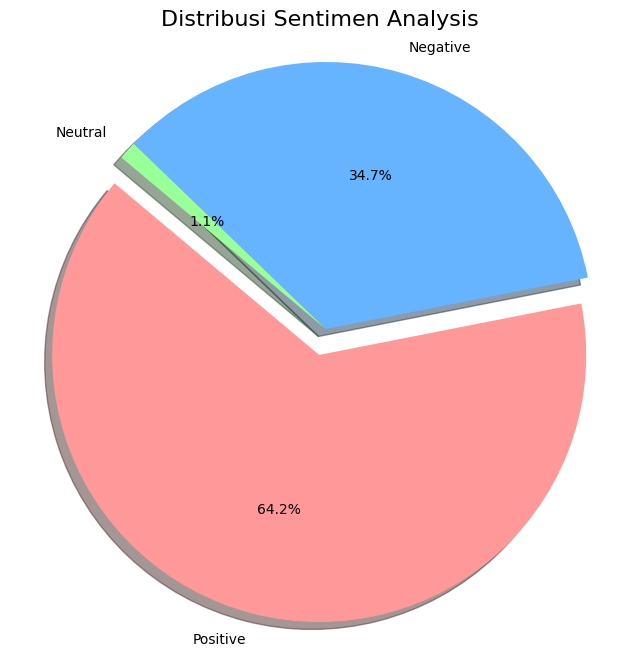

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df_clean = pd.read_csv("data/BA_reviews_cleaned.csv")

# Menghitung polaritas
df_clean['polarity'] = df_clean['reviews'].apply(polarity_calc)

# Menambahkan tag berdasarkan polaritas
df_clean['tag'] = df_clean['polarity'].apply(tag_cal)

# Menghitung jumlah masing-masing tag
tag_counts = df_clean['tag'].value_counts()

# Warna dan gaya estetik
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # Untuk menyoroti sebagian

# Membuat diagram lingkaran (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Distribusi Sentimen Analysis', fontsize=16)

# Menampilkan diagram lingkaran
plt.axis('equal')
plt.show()


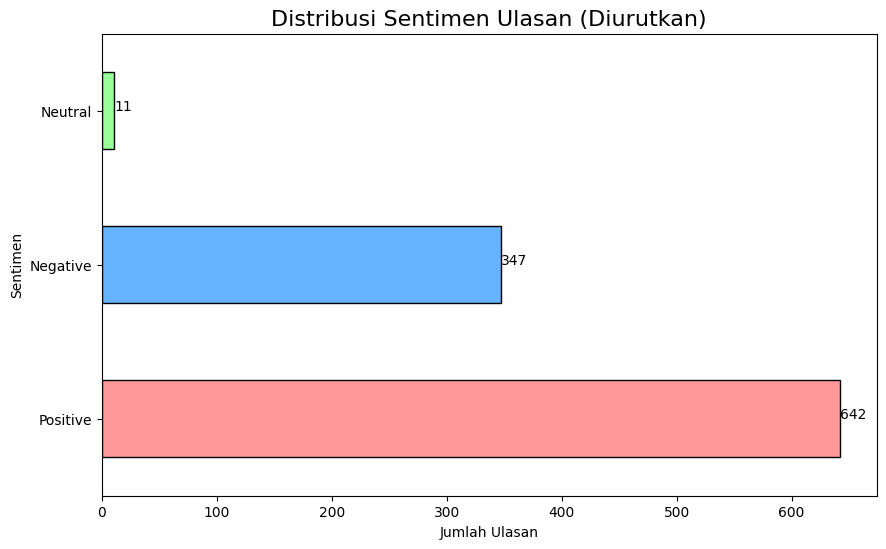

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df_clean = pd.read_csv("data/BA_reviews_cleaned.csv")

# Menghitung polaritas
df_clean['polarity'] = df_clean['reviews'].apply(polarity_calc)

# Menambahkan tag berdasarkan polaritas
df_clean['tag'] = df_clean['polarity'].apply(tag_cal)

# Menghitung jumlah masing-masing tag
tag_counts = df_clean['tag'].value_counts()

# Mengurutkan data berdasarkan jumlah tag dari yang terbesar ke terkecil
tag_counts = tag_counts.sort_values(ascending=False)

# Warna dan gaya estetik
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.1, 0, 0)  # Untuk menyoroti sebagian

# Membuat diagram batang horizontal
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Sentimen')
plt.title('Distribusi Sentimen Ulasan (Diurutkan)', fontsize=16)

# Menambahkan label pada bar
for index, value in enumerate(tag_counts):
    plt.text(value, index, str(value))

# Menampilkan diagram
plt.show()


##Positive Wordcloud Sentiment

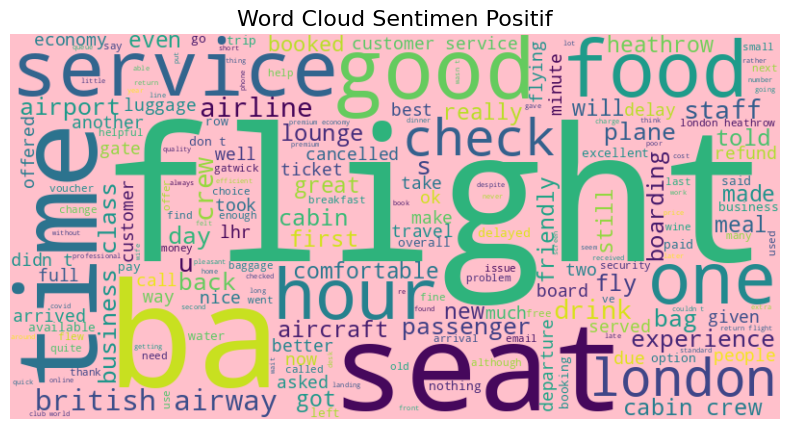

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Membaca dataset
df_clean = pd.read_csv("data/BA_reviews_cleaned.csv")

# Menghitung polaritas
df_clean['polarity'] = df_clean['reviews'].apply(polarity_calc)

# Menambahkan tag berdasarkan polaritas
df_clean['tag'] = df_clean['polarity'].apply(tag_cal)

# Membuat teks dari ulasan dengan sentimen positif
text_positive = " ".join(df_clean[df_clean['tag'] == 'Positive']['reviews'])

# Membuat WordCloud untuk sentimen positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='pink').generate(text_positive)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Sentimen Positif', fontsize=16)
plt.show()


##Negative Wordcloud Sentiment

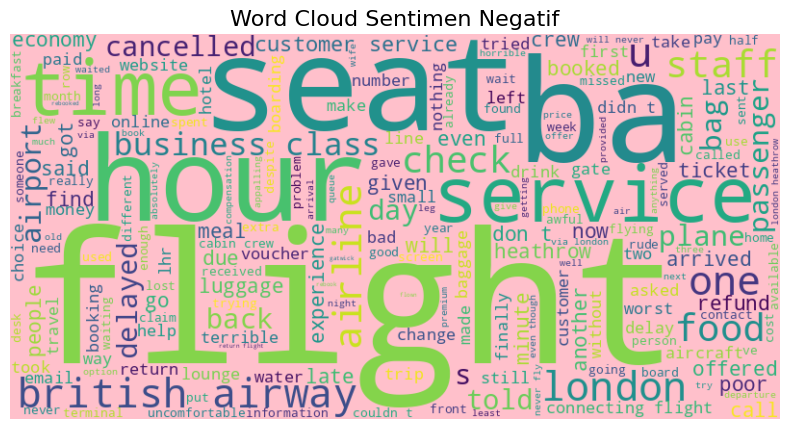

In [ ]:
# Membuat teks dari ulasan dengan sentimen negatif
text_negative = " ".join(df_clean[df_clean['tag'] == 'Negative']['reviews'])

# Membuat WordCloud untuk sentimen negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='pink').generate(text_negative)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Sentimen Negatif', fontsize=16)
plt.show()


##Neutral Wordcloud Sentiment

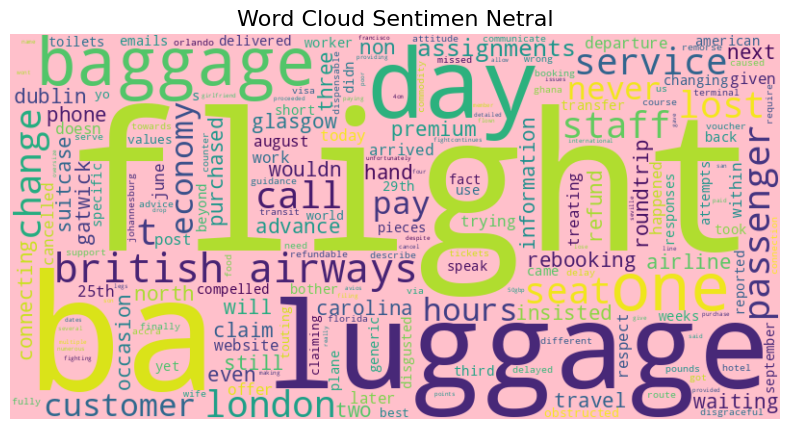

In [ ]:
# Membuat teks dari ulasan dengan sentimen netral
text_neutral = " ".join(df_clean[df_clean['tag'] == 'Neutral']['reviews'])

# Membuat WordCloud untuk sentimen netral
wordcloud_neutral = WordCloud(width=800, height=400, background_color='pink').generate(text_neutral)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud Sentimen Netral', fontsize=16)
plt.show()


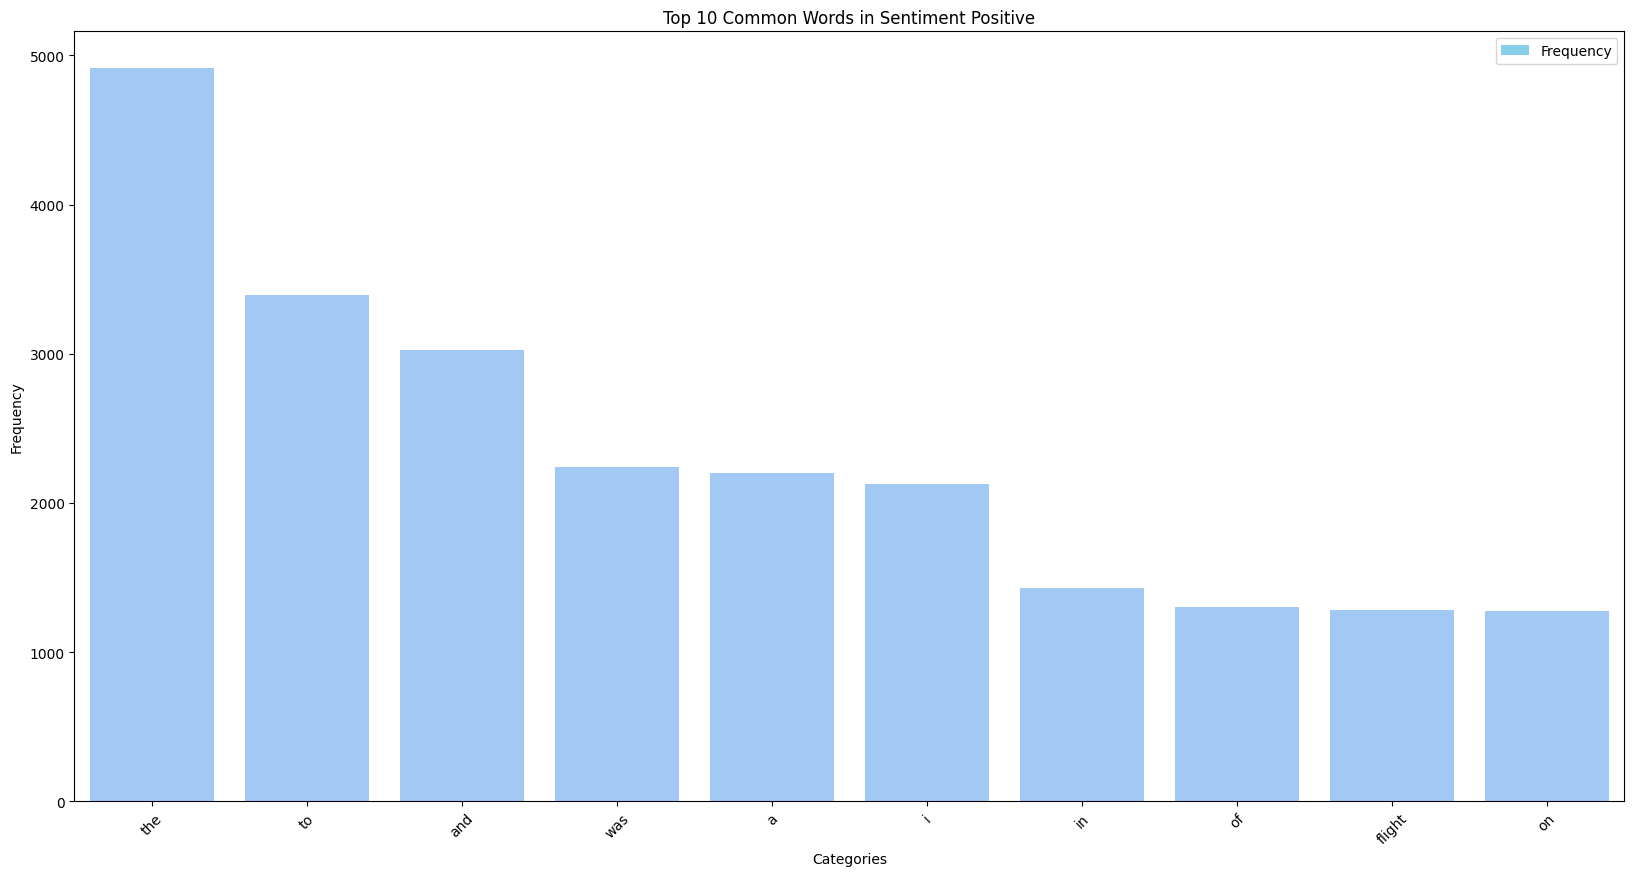

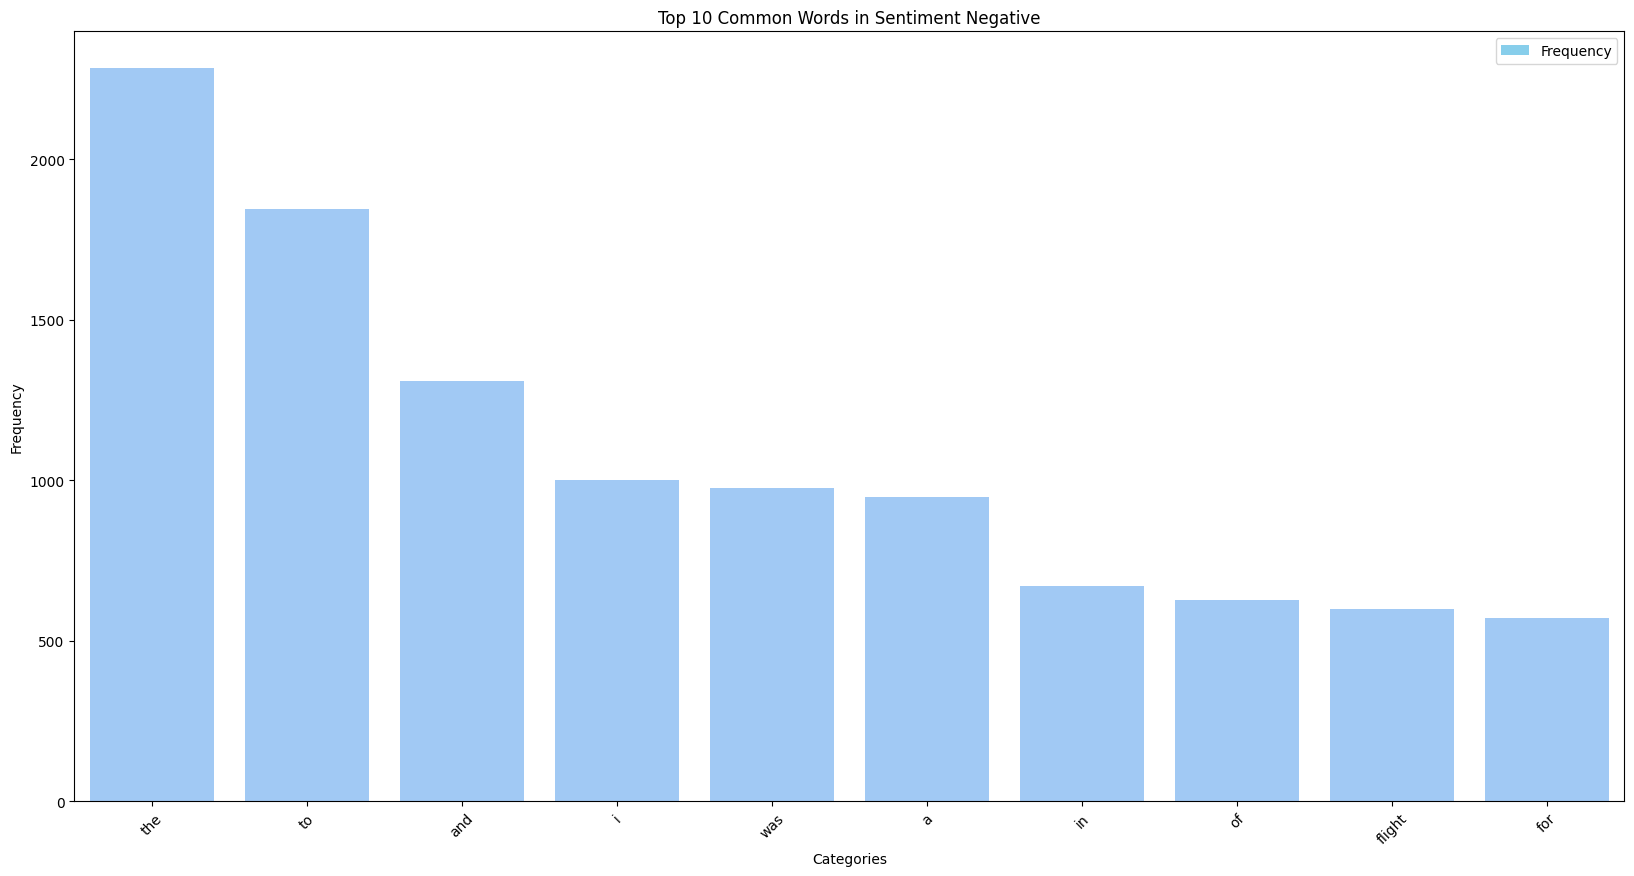

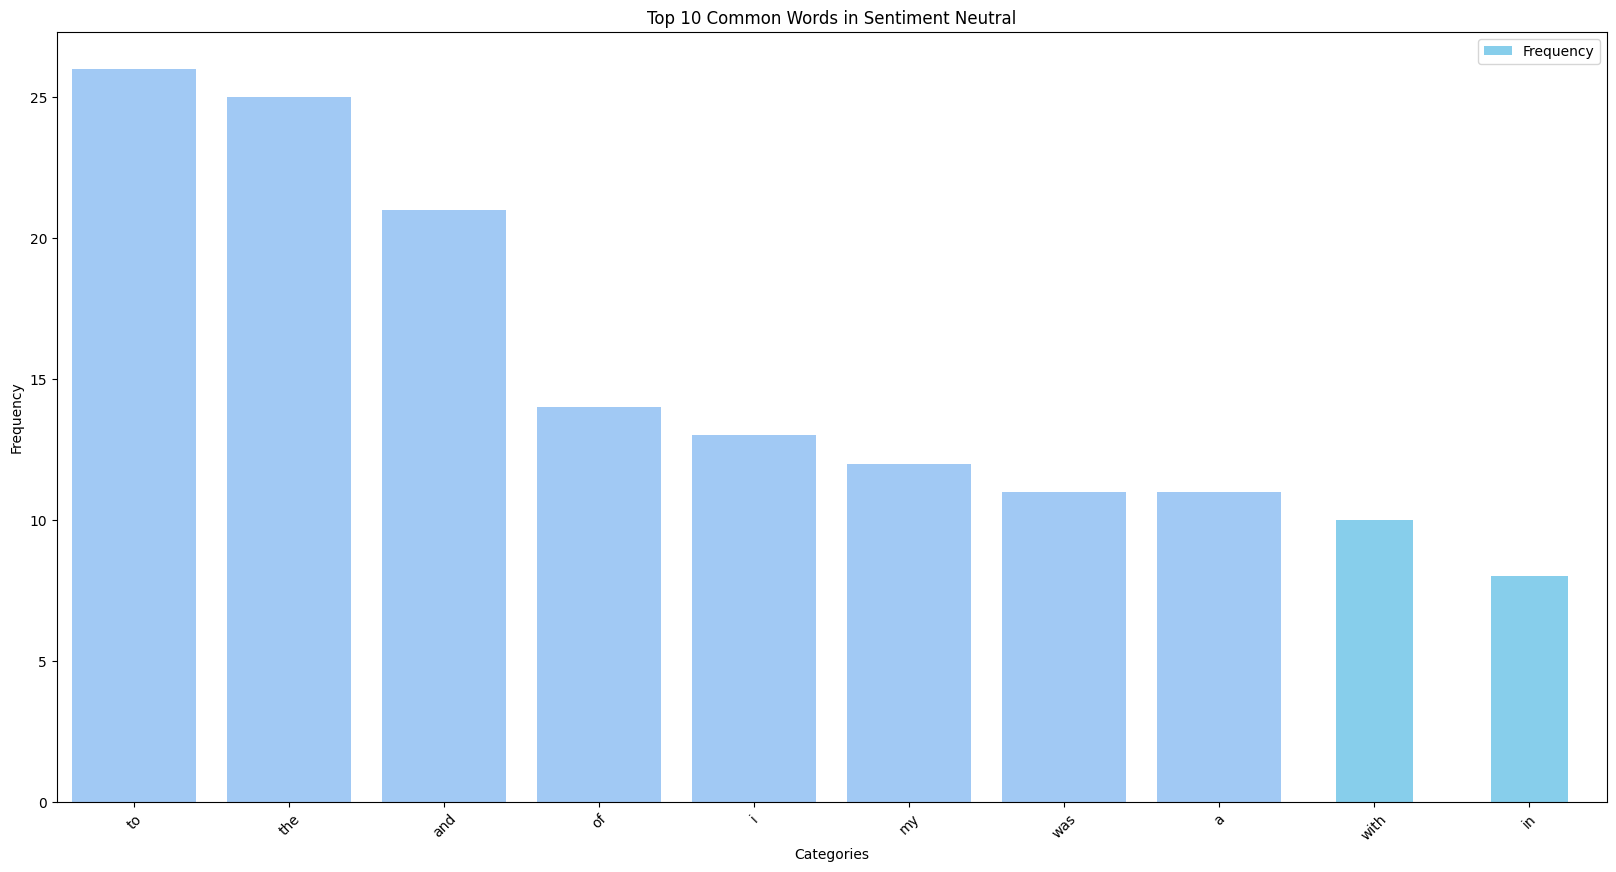

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Fungsi untuk menghitung frekuensi kata-kata dalam kategori sentimen tertentu
def count_words(sentiment_category):
    # Menggabungkan semua ulasan dalam kategori sentimen tersebut
    text = " ".join(df_clean[df_clean['tag'] == sentiment_category]['reviews'])

    # Tokenisasi teks dan menghitung frekuensi kata-kata
    words = text.split()
    word_freq = Counter(words)

    # Mengambil kata-kata yang paling umum (misalnya, 10 kata teratas)
    top_words = word_freq.most_common(10)

    return dict(top_words)

# Kategori sentimen yang akan dianalisis
sentiment_categories = ['Positive', 'Negative', 'Neutral']

# Membuat Bar Plot untuk setiap kategori sentimen
for sentiment_category in sentiment_categories:
    word_freq_dict = count_words(sentiment_category)
    word_freq_df = pd.DataFrame.from_dict(word_freq_dict, orient='index', columns=['Frequency'])
    word_freq_df.plot(kind='bar', color='skyblue', figsize=(10, 6))
    plt.title(f'Top 10 Common Words in Sentiment {sentiment_category}')
    plt.xlabel('Kata-kata')
    plt.ylabel('Frekuensi')

    # Putar label sumbu x
    ax = plt.gca()
    ax.tick_params(axis='x', rotation=45)

    # Tambahkan kode berikut untuk menambahkan kategorisasi berdasarkan frekuensi
    cat_score_dict = dict(Counter(word_freq_dict))
    more_than_10_cat = dict((key, value) for (key, value) in cat_score_dict.items() if value > 10)
    ax.bar(more_than_10_cat.keys(), more_than_10_cat.values())
    ax.figure.set_figwidth(20)
    ax.figure.set_figheight(10)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')

    plt.show()
